In [16]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
df = pd.read_csv('Groceries_dataset.csv')
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [9]:


print("\nNumber of unique members:", df['Member_number'].nunique())
transactions = df.groupby('Member_number')['itemDescription'].apply(list).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)



Number of unique members: 3898


In [26]:


# Run Apriori to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate rules with confidence ≥ 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Display the rules
print(rules)


           antecedents         consequents  antecedent support  \
0      (bottled water)        (whole milk)            0.213699   
1         (rolls/buns)  (other vegetables)            0.349666   
2   (other vegetables)        (whole milk)            0.376603   
3         (whole milk)  (other vegetables)            0.458184   
4             (yogurt)  (other vegetables)            0.282966   
5         (rolls/buns)        (whole milk)            0.349666   
6    (root vegetables)        (whole milk)            0.230631   
7            (sausage)        (whole milk)            0.206003   
8               (soda)        (whole milk)            0.313494   
9     (tropical fruit)        (whole milk)            0.233710   
10            (yogurt)        (whole milk)            0.282966   

    consequent support   support  confidence      lift  representativity  \
0             0.458184  0.112365    0.525810  1.147597               1.0   
1             0.376603  0.146742    0.419663  1.114335 

In [27]:
# 6. Display Results
print("\nFrequent Itemsets:")
print(frequent_itemsets)




Frequent Itemsets:
     support                        itemsets
0   0.119548                          (beef)
1   0.158799                  (bottled beer)
2   0.213699                 (bottled water)
3   0.135967                   (brown bread)
4   0.126475                        (butter)
5   0.165213                   (canned beer)
6   0.100564                       (chicken)
7   0.185480                  (citrus fruit)
8   0.114931                        (coffee)
9   0.120831                          (curd)
10  0.133145                 (domestic eggs)
11  0.137506                   (frankfurter)
12  0.102617             (frozen vegetables)
13  0.124936         (fruit/vegetable juice)
14  0.116983                     (margarine)
15  0.139815                    (newspapers)
16  0.376603              (other vegetables)
17  0.177527                        (pastry)
18  0.170600                     (pip fruit)
19  0.132376                          (pork)
20  0.349666                    (ro

In [28]:
print("\nAssociation Rules:")
print(rules)




Association Rules:
           antecedents         consequents  antecedent support  \
0      (bottled water)        (whole milk)            0.213699   
1         (rolls/buns)  (other vegetables)            0.349666   
2   (other vegetables)        (whole milk)            0.376603   
3         (whole milk)  (other vegetables)            0.458184   
4             (yogurt)  (other vegetables)            0.282966   
5         (rolls/buns)        (whole milk)            0.349666   
6    (root vegetables)        (whole milk)            0.230631   
7            (sausage)        (whole milk)            0.206003   
8               (soda)        (whole milk)            0.313494   
9     (tropical fruit)        (whole milk)            0.233710   
10            (yogurt)        (whole milk)            0.282966   

    consequent support   support  confidence      lift  representativity  \
0             0.458184  0.112365    0.525810  1.147597               1.0   
1             0.376603  0.146742   

In [31]:
# 7. Example filtering rules.
print("\nRules with high confidence:")
print(rules[rules['confidence'] >= 0.5]) #example filter



Rules with high confidence:
           antecedents   consequents  antecedent support  consequent support  \
0      (bottled water)  (whole milk)            0.213699            0.458184   
2   (other vegetables)  (whole milk)            0.376603            0.458184   
5         (rolls/buns)  (whole milk)            0.349666            0.458184   
7            (sausage)  (whole milk)            0.206003            0.458184   
10            (yogurt)  (whole milk)            0.282966            0.458184   

     support  confidence      lift  representativity  leverage  conviction  \
0   0.112365    0.525810  1.147597               1.0  0.014452    1.142615   
2   0.191380    0.508174  1.109106               1.0  0.018827    1.101643   
5   0.178553    0.510638  1.114484               1.0  0.018342    1.107190   
7   0.106978    0.519303  1.133394               1.0  0.012591    1.127146   
10  0.150590    0.532185  1.161510               1.0  0.020940    1.158185   

    zhangs_metric   j

In [32]:
print("\nRules sorted by lift:")
print(rules.sort_values(by="lift", ascending=False).head(10)) #example sort


Rules sorted by lift:
           antecedents         consequents  antecedent support  \
10            (yogurt)        (whole milk)            0.282966   
0      (bottled water)        (whole milk)            0.213699   
7            (sausage)        (whole milk)            0.206003   
4             (yogurt)  (other vegetables)            0.282966   
5         (rolls/buns)        (whole milk)            0.349666   
1         (rolls/buns)  (other vegetables)            0.349666   
2   (other vegetables)        (whole milk)            0.376603   
3         (whole milk)  (other vegetables)            0.458184   
9     (tropical fruit)        (whole milk)            0.233710   
6    (root vegetables)        (whole milk)            0.230631   

    consequent support   support  confidence      lift  representativity  \
10            0.458184  0.150590    0.532185  1.161510               1.0   
0             0.458184  0.112365    0.525810  1.147597               1.0   
7             0.458184

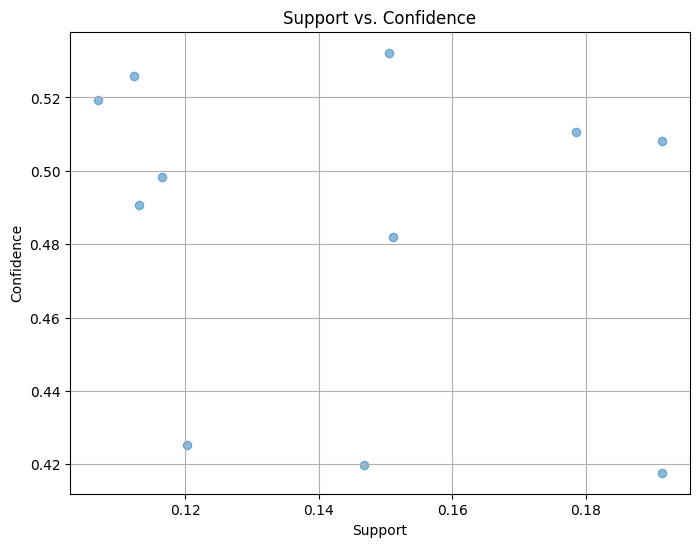

In [33]:
# 5. Visualization: Scatter plot of support vs. confidence
def plot_scatter_support_confidence(rules):

    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs. Confidence')
    plt.grid(True)
    plt.show()

plot_scatter_support_confidence(rules)

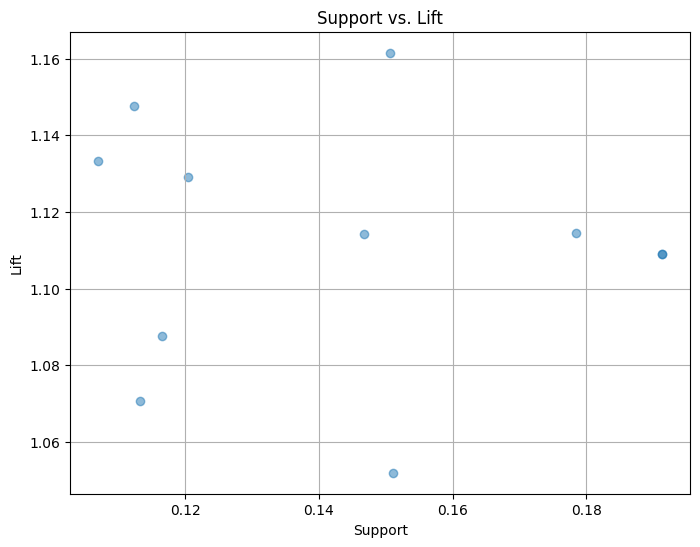

In [34]:
# 6. Visualization: Scatter plot of support vs. lift
def plot_scatter_support_lift(rules):
    """Plots a scatter plot of support vs. lift."""
    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['lift'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Lift')
    plt.title('Support vs. Lift')
    plt.grid(True)
    plt.show()

plot_scatter_support_lift(rules)